## Tanzania Wells Project
For this project I am using data provided by Taarifa and the Tanzanian Ministry of Water to produce a model to predict which wells need repairs and which wells don't work at all.  The data was pulled from the ongoing competition from this website: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

## Process
For this process I will use the OSEMN process.  This notebook is dedicated to Obtaining and Scrubbing the data as well as Exploratory analysis.  I will create other notebooks containing the Modeling and iNterpretations of the data.

### Import Libraries Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline


In [2]:
# Import the data

df = pd.read_csv('training_set_values.csv')

df_train_labels = pd.read_csv('training_set_labels.csv')

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
df_train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
df = pd.merge(df, df_train_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [6]:
df.shape

(59400, 41)

### Features Defined
amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one
num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

## Cleaning, exploration, and preprocessing
The target we are trying to predict is the 'status_group' that is found in the training_labels dataframe.  There are three different status results: function, non functional, and functional needs repair. 

## Categorical Data Cleaning

In [7]:
df_train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [8]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Text(0,0.5,'Well Count')

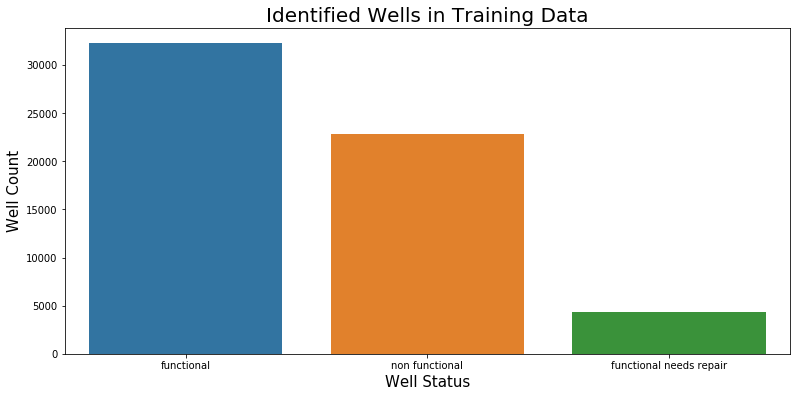

In [9]:
#Visualizingthe well status
plt.figure(figsize=(13,6))
sns.countplot(df.status_group)
df.status_group.value_counts()
plt.title("Identified Wells in Training Data", fontsize=20)
plt.xlabel("Well Status", fontsize=15)
plt.ylabel("Well Count", fontsize=15)

<Figure size 1008x432 with 0 Axes>

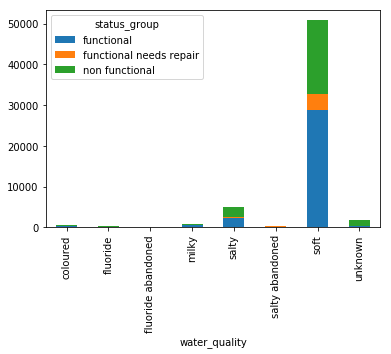

In [73]:
# Visualizing the water quality based on well status
df_plot = df.groupby(['water_quality', 'status_group']).size().reset_index().pivot(columns='status_group', index='water_quality', values=0)
plt.figure(figsize=(14,6))
df_plot.plot(kind='bar', stacked=True)
#sns.countplot(data=df, x='water_quality', hue='status_group', stacked=True)
#plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
#df.water_quality.value_counts()
#plt.title("Water Quality by Well Status")
#plt.xlabel("Water Quality")
#plt.ylabel("Well Counts")

In [76]:
# Visualizing based on regions
plt.figure(figsize=(24,9))
sns.countplot(data=df, x='region', hue='status_group')
plt.title("Well Status By Region")
plt.xlabel("Regions of Tanzania")
plt.ylabel("Well Counts")

ValueError: Could not interpret input 'region'

<Figure size 1728x648 with 0 Axes>

Text(0,0.5,'Well Counts')

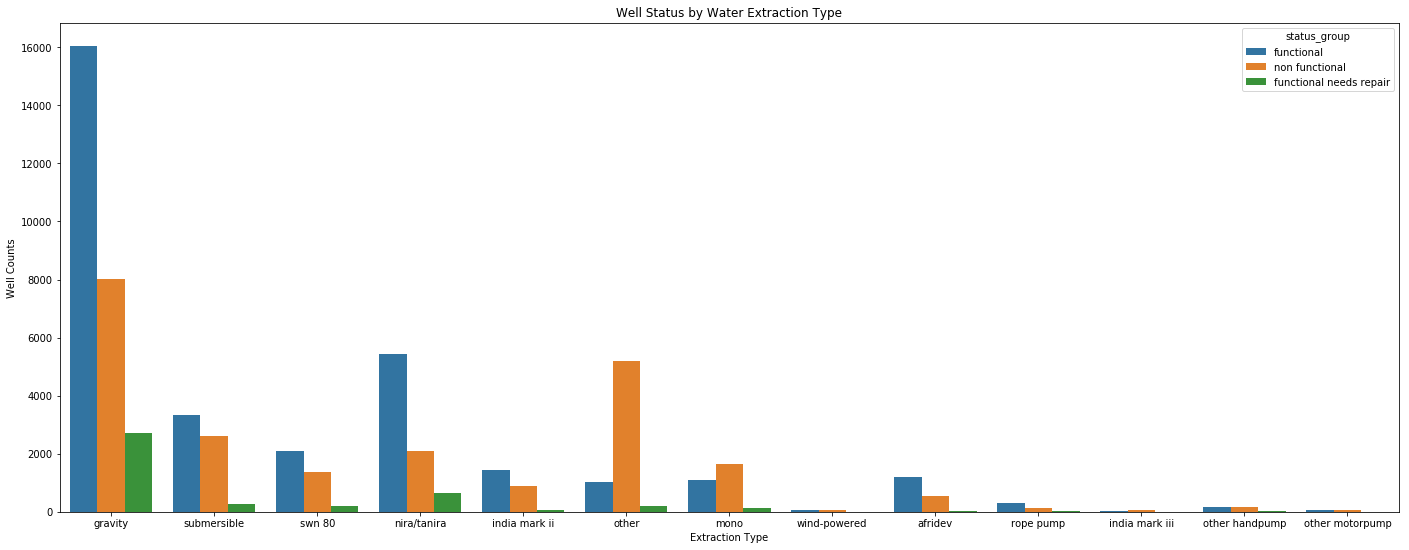

In [12]:
# Visualizing based on extraction type
plt.figure(figsize=(24,9))
sns.countplot(data=df, x='extraction_type_group', hue='status_group')
plt.title('Well Status by Water Extraction Type')
plt.xlabel('Extraction Type')
plt.ylabel('Well Counts')

Text(0,0.5,'Well Counts')

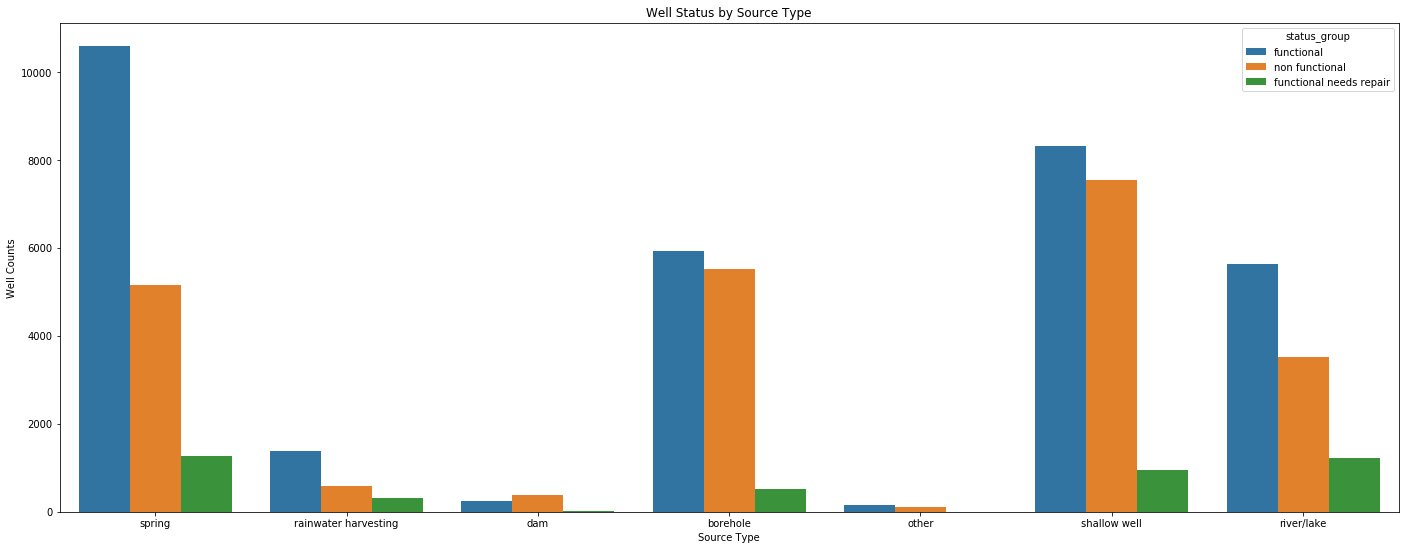

In [13]:
# Source Type Visualization
plt.figure(figsize=(24,9))
sns.countplot(data=df, x='source_type', hue='status_group')
plt.title('Well Status by Source Type')
plt.xlabel('Source Type')
plt.ylabel('Well Counts')

Text(0,0.5,'Well Counts')

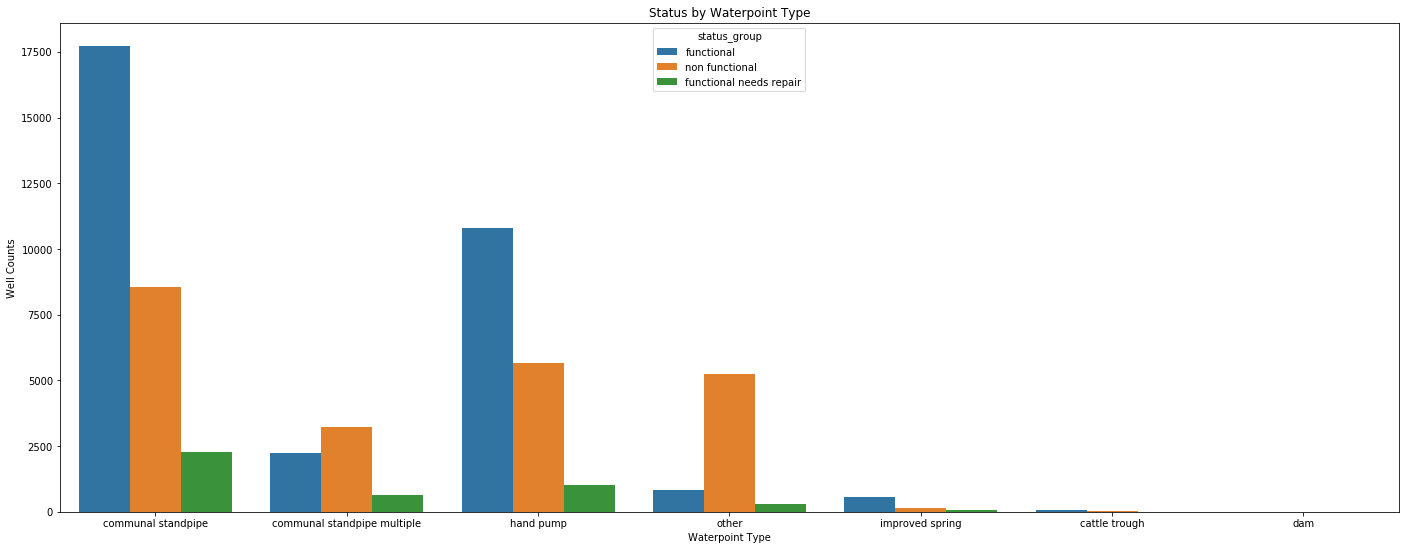

In [14]:
# Waterpoint type visualization
plt.figure(figsize=(24,9))
sns.countplot(data=df, x='waterpoint_type', hue='status_group')
plt.title("Status by Waterpoint Type")
plt.xlabel("Waterpoint Type")
plt.ylabel("Well Counts")

Text(0,0.5,'Well Counts')

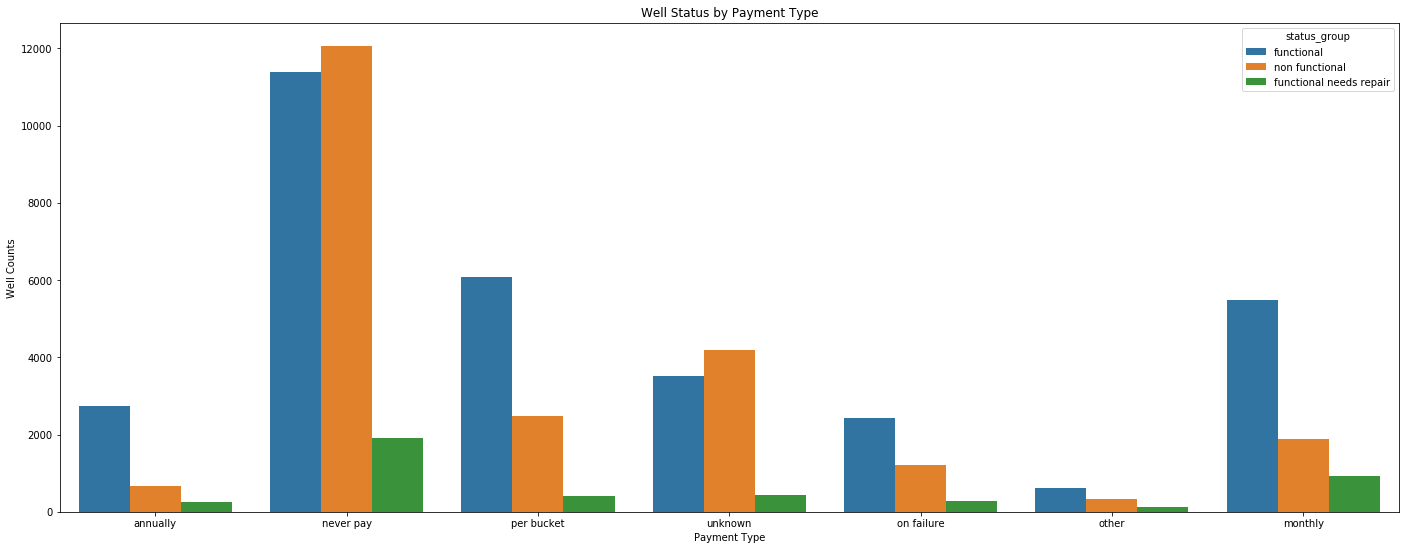

In [15]:
# Visualization payment type
plt.figure(figsize=(24,9))
sns.countplot(data=df, x='payment_type', hue='status_group')
plt.title("Well Status by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Well Counts")

In [16]:
pd.options.display.max_rows = 4000
df['funder'].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

It seems like the top 8 funders (over 1000 entries) could be an interesting predictor, but the rest of the funders can be categorized as other.  This will cut down on dummy variables but allow for the information to still be used.

In [17]:
def funder_organizer(row):
    "Keeping the top 8 values and setting the rest to 'other'"
    if row['funder'] == 'Government Of Tanzania':
        return 'gov'
    elif row['funder'] == 'Danida':
        return 'danida'
    elif row['funder'] == 'Hesawa':
        return 'hesawa'
    elif row['funder'] == 'Rwssp':
        return 'rwssp'
    elif row['funder'] == 'World Bank':
        return 'world_bank'
    elif row['funder'] == 'Kkkt':
        return 'kkkt'
    elif row['funder'] == 'World Vision':
        return 'world_vision'
    elif row['funder'] == 'Unicef':
        return 'unicef'
    else:
        return 'other'
df['funder'] = df.apply(lambda row: funder_organizer(row), axis=1)
    
    

In [18]:
df['installer'].value_counts()

DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
KKKT                                898
Hesawa                              840
0                                   777
TCRS                                707
Central government                  622
CES                                 610
Community                           553
DANID                               552
District Council                    551
HESAWA                              539
World vision                        408
LGA                                 408
WEDECO                              397
TASAF                               396
District council                    392
Gover                               383
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287


Once again we see a top percentage being installed by a handful of groups.  In order to reduce the amount of dummy variables but to retain the information let's keep ones that are greater than 1000 (top five this time).

In [19]:
def installer_organizer(row):
    if row['installer'] == 'DWE':
        return 'dwe'
    elif row['installer'] == 'Government':
        return 'government'
    elif row['installer'] == 'RWE':
        return 'rwe'
    elif row['installer'] == 'Commu':
        return 'commu'
    elif row['installer'] == 'Danida':
        return 'danida'
    else:
        return 'other'
df['installer'] = df.apply(lambda row: installer_organizer(row), axis=1)

In [20]:
df['subvillage'].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Makokondo      1
Kisolo         1
Mlegeni        1
M/Kate         1
Bugomwa        1
Name: subvillage, Length: 19287, dtype: int64

In [21]:
len(df['subvillage'].value_counts())

19287

With 19,287 unique values and none of them having over 1000 this would increase the amount of dummy variables to an extent that isn't worth it right now.

In [22]:
df = df.drop('subvillage', axis=1)

In [23]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

For this column we have two results as well as the ones that are missing.  It seems to make sense for those missing values replace the null with 'unknown' since we don't know if there was a public meeting.

In [24]:
df['public_meeting'] = df['public_meeting'].fillna('unknown')
df['public_meeting'].value_counts()

True       51011
False       5055
unknown     3334
Name: public_meeting, dtype: int64

In [25]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

Again, we see that a majority are managed and there's already an 'Other' column.  Private operator and company aren't specific and probably can get added to the other column as well as SWC and Trust since they are over such a minimal amount of wells.  None can also be added to other.

In [26]:
def scheme_management_organizer(row):
    if row['scheme_management'] == 'VWC':
        return 'VWC'
    elif row['scheme_management'] == 'WUG':
        return 'WUG'
    elif row['scheme_management'] == 'Water authority':
        return 'water_authority'
    elif row['scheme_management'] == 'WUA':
        return 'WUA'
    elif row['scheme_management'] == 'Water Board':
        return 'water_board'
    elif row['scheme_management'] == 'Parastatal':
        return 'parastatal'
    else:
        return 'other'
df['scheme_management'] = df.apply(lambda row: scheme_management_organizer(row), axis=1 )

In [27]:
df['scheme_management'].value_counts()

VWC                36793
other               6937
WUG                 5206
water_authority     3153
WUA                 2883
water_board         2748
parastatal          1680
Name: scheme_management, dtype: int64

In [28]:
df['scheme_name'].value_counts()

K                                                 682
None                                              644
Borehole                                          546
Chalinze wate                                     405
M                                                 400
DANIDA                                            379
Government                                        320
Ngana water supplied scheme                       270
wanging'ombe water supply s                       261
wanging'ombe supply scheme                        234
I                                                 229
Bagamoyo wate                                     229
Uroki-Bomang'ombe water sup                       209
N                                                 204
Kirua kahe gravity water supply trust             193
Machumba estate pipe line                         185
Makwale water supplied sche                       166
Kijiji                                            161
S                           

In [29]:
len(df['scheme_name'].value_counts())

2696

This is similar to the subvillage data with 2696 unique values and none of them accounting for more than 1000.  It seems like creating dummy values for this wouldn't be worth the time so it makes sense to drop the column.

In [30]:
df = df.drop('scheme_name', axis=1)

In [31]:
# Onto the final column with missing data
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

Once again we are dealing with two possible outcomes and it might be a helpful feature so replacing the missing values with 'unknown' makes sense.


In [32]:
df['permit'] = df['permit'].fillna('Unknown')
df['permit'].value_counts()

True       38852
False      17492
Unknown     3056
Name: permit, dtype: int64

In [33]:
df.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

Missing data is taken care of, now to checkout the datatypes to make sure that they are correctly formatted.  

In [34]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [35]:
# Change the date columns time-date data
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [36]:
# Continue checking out the categorical data
pd.options.display.max_rows = 40000
df['wpt_name'].value_counts()

none                              3563
Shuleni                           1748
Zahanati                           830
Msikitini                          535
Kanisani                           323
Bombani                            271
Sokoni                             260
Ofisini                            254
School                             208
Shule Ya Msingi                    199
Shule                              152
Sekondari                          146
Muungano                           133
Mkombozi                           111
Madukani                           104
Hospital                            94
Mbugani                             94
Upendo                              93
Kituo Cha Afya                      90
Mkuyuni                             88
Umoja                               84
Center                              83
Ccm                                 81
Kisimani                            78
Ofisi Ya Kijiji                     76
Mtakuja                  

 There are 37,400 unique names for the waterpoints.  There are some that acount for multiple but there isn't a top few that stick out in comparison to all the values so it makes sense to drop this column.

In [37]:
df = df.drop('wpt_name', axis=1)

The next features: basin, region, lga, and ward are all listed as geographical data.  That means they are probably highly correlated to each other so it would be good to narrow down to one geographical feature to test.

In [38]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [39]:
len(df['basin'].value_counts())

9

In [40]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [41]:
len(df['region'].value_counts())

21

In [42]:
df['lga'].value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Kigoma Rural         824
Magu                 824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Lushoto              694
Namtumbo             694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               544


In [43]:
len(df['lga'].value_counts())

125

In [44]:
df['ward'].value_counts()

Igosi                      307
Imalinyi                   252
Siha Kati                  232
Mdandu                     231
Nduruma                    217
Kitunda                    203
Mishamo                    203
Msindo                     201
Chalinze                   196
Maji ya Chai               190
Usuka                      187
Ngarenanyuki               172
Chanika                    171
Vikindu                    162
Mtwango                    153
Matola                     145
Zinga/Ikerege              141
Maramba                    139
Wanging'ombe               139
Itete                      137
Magomeni                   135
Ifakara                    134
Kikatiti                   134
Olkokola                   133
Maposeni                   130
Mvomero                    129
Igongolo                   129
Mlangali                   125
Nkoma                      122
Nkungulu                   121
Mahongole                  121
Rujewa                     120
Simbo   

In [45]:
len(df['ward'].value_counts())

2092

Comparing these columns ward has over 2000 unique values, lga has 125, while region has just 21 and basin has 9.  I will start with basin and drop the others for now.  But they might be helpful later.

In [46]:
df=df.drop(['region', 'lga', 'ward'], axis=1)

In [47]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

All of these entries are the same so this feature won't help in prediction.

In [48]:
df = df.drop('recorded_by', axis=1)

In [49]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [50]:
len(df['extraction_type'].value_counts())

18

In [51]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [52]:
len(df['extraction_type_group'].value_counts())

13

In [53]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [54]:
len(df['extraction_type_class'].value_counts())

7

Extraction type, extraction type group and extraction type class all have very similar data.  It makes sense to keep the extraction type class for now as it seems like that will be a better predictor and keep down the extra dummy values.  

In [55]:
df = df.drop(['extraction_type', 'extraction_type_group'], axis=1)

In [56]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [57]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

These are both very similar to the information provided by the scheme management column so we can drop these two columns as they don't add new information.

In [58]:
df = df.drop(['management', 'management_group'], axis=1)

In [59]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [60]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

These two columns are identical. Payment type is more descriptive of what is in the column so it makes sense to keep that one.

In [61]:
df = df.drop('payment', axis=1)

In [62]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [63]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

These are almost identical.  The difference is identifying fluoride and if it was abandoned.  Keeping water quality makes sense.

In [64]:
df = df.drop('quality_group', axis=1)

In [65]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [66]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These columns are once again identical so keeping the quantity column makes sense.

In [67]:
df = df.drop('quantity_group', axis=1)

In [68]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [69]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [70]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

Source and source type are identical while source class is different but could be highly correlated with either of these.  It makes sense to just keep one so I will keep source as it is the most specific of the three.

In [71]:
df = df.drop(['source_type', 'source_class'], axis=1)

In [72]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [73]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

Once again, fairly identical although waterpoint_type breaks down the communal standpipe into if there's multiple standpipes.  So keeping that one will help be more specific in predictions.

In [74]:
df = df.drop('waterpoint_type_group', axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 24 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
basin                    59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null int64
extraction_type_class    59400 non-null object
payment_type             59400 non-null o

For the categorical data, I've reduced the number of one-hot-encoding columns that will be made to increase the ability for the model to effectively predict.  Now for the numerical columns.

## Numerical Data Cleanup

In [76]:
df['id'].value_counts()

2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64

The id isn't really needed as each row has a unique id.  We used it to combine our target and our features into one dataframe, but we can drop that column now.

In [77]:
df = df.drop('id', axis=1)

In [78]:
df['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

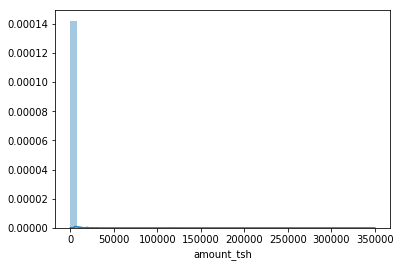

In [79]:
sns.distplot(df['amount_tsh'])
plt.show()

Looking at the summary and the distribution plot we can see that half of the wells have a value of 0 for the amount of water available at the pump.  The top 25% range from 20 to 350,000.  Not sure if I will keep this one.  I need to check out the other numerical data first.

For the date recorded, it seems to make sense to make that into a quantitative measure.  Thinking about how the date recorded could impact the status of the well, perhaps the ones that are more recently recorded might be more likely to be functional since they had someone record its statistics.

In [80]:
df['date_recorded'].describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

So the most recent recordings happened on 12/03/2013.  If we subtract each of the entries from that date to create a new column for days_since_recorded column.

In [81]:
df['date_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(df['date_recorded'])
df.columns = ['days_since_recorded' if x == 'date_recorded' else x for x in df.columns]
df['days_since_recorded'] = df['days_since_recorded'].astype('timedelta64[D]').astype(int)
df['days_since_recorded'].describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [82]:
df['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

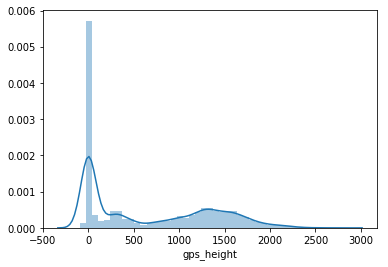

In [83]:
sns.distplot(df['gps_height'])

In [84]:
df['latitude'].describe()

count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64

In [85]:
df['longitude'].describe()

count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64

While latitude and longitude could be helpful if we didn't have the other geographical information from the basin, then it might be worth keeping.  Maybe I'll come back for it. GPS height seems to be worth seeing how it helps to predict as the altitude could contribute to the status of the well.

In [86]:
df = df.drop(['latitude', 'longitude'], axis=1)

In [87]:
df['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

There isn't a description for this feature given on the Driven Data website and it seems to be all the same entry so I will drop this.

In [88]:
df = df.drop('num_private', axis=1)

In [89]:
df['region_code'].describe()

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64

In [90]:
df['district_code'].describe()

count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64

These seem to be other ways of identifying data geographically by a code assigned. We already have geographical data covered and I don't think this will add to what is already included.

In [91]:
df = df.drop(['region_code', 'district_code'], axis=1)

In [92]:
df['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

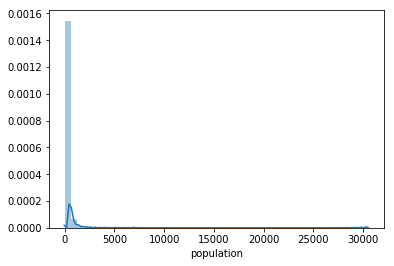

In [93]:
sns.distplot(df['population'])

This is similarly distributed as the amount_tsh.  This seems to provide different data as it is how many people live around the well.  This would seemingly impact the status of the well.

In [94]:
df['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [95]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [96]:
len(df['construction_year'].value_counts())

55

There are 55 unique years that wells were built spanning from 1961-2013 and then many without a year that we should replace with 'unknown'.

In [97]:
def construction_organizer(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '1960s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '1970s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '1980s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '1990s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '2000s'
    elif row['construction_year'] >= 2010 and row['construction_year'] < 2020:
        return '2010s'
    else:
        return 'unknown'

df['construction_year'] = df.apply(lambda row: construction_organizer(row), axis=1)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int64
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
basin                    59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
payment_type             59400 non-null object
water_quality            59400 non-null object
quantity                 59400 non-null object
source                   59400 non-null object
waterpoint_type          59400 non-null object
status_group             59400 non-null object
dtypes: float64(1), int64(3), object(14)
memory

In [99]:
# Adding a column that gives the status_group target values numbers so its easier for analysis
# 2 - functional, 1 - functional needs repair, 0 - non functional
#df['status_group_outcome'] = df['status_group'].replace({'functional':2, 'functional needs repair':1, 'non functional': 0})
#df.head()

In [100]:
# Drop the status_group column for the status_group_outcome column
#df = df.drop('status_group', axis=1)

In [101]:
# Let's save this to a cvs to use in a new notebook to create models
df.to_csv('train_for_models.csv', index=False)

## Test Set Modifications
We need to do the same drops and adjustments that we did to the training data to the test data.

In [102]:
test = pd.read_csv('test_set_values.csv')
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [103]:
test.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [104]:
# Dropping the columns we dropped from the train data
test = test.drop(['longitude', 'latitude', 'wpt_name', 'num_private', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'], axis=1)

In [105]:
# Adjusting the date recorded column to measure the days since recorded
test['date_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(test['date_recorded'])
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test['days_since_recorded'] = test['days_since_recorded'].astype('timedelta64[D]').astype(int)

In [106]:
# Filling the missing data in permit and public meeting
test['permit'] = test['permit'].fillna('unknown')
test['public_meeting'] = test['public_meeting'].fillna('unknown')

In [107]:
# Using the functions I made to adjust scheme management, construction year, installer, and funder 
test['scheme_management'] = test.apply(lambda row: scheme_management_organizer(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_organizer(row), axis=1)
test['installer'] = test.apply(lambda row: installer_organizer(row), axis=1)
test['funder'] = test.apply(lambda row: funder_organizer(row), axis=1)

In [108]:
df.shape

(59400, 18)

In [109]:
test.shape

(14850, 18)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int64
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
basin                    59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
payment_type             59400 non-null object
water_quality            59400 non-null object
quantity                 59400 non-null object
source                   59400 non-null object
waterpoint_type          59400 non-null object
status_group             59400 non-null object
dtypes: float64(1), int64(3), object(14)
memory

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 18 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
days_since_recorded      14850 non-null int64
funder                   14850 non-null object
gps_height               14850 non-null int64
installer                14850 non-null object
basin                    14850 non-null object
population               14850 non-null int64
public_meeting           14850 non-null object
scheme_management        14850 non-null object
permit                   14850 non-null object
construction_year        14850 non-null object
extraction_type_class    14850 non-null object
payment_type             14850 non-null object
water_quality            14850 non-null object
quantity                 14850 non-null object
source                   14850 non-null object
waterpoint_type          14850 non-null object
dtypes: float64(1), int64(4), object(13)
memory 

Since we don't have the labels for the test set then we know that these two sets are matched up.  Let's save it as a file to use later.

In [112]:
test.to_csv('test_for_models.csv', index=False)